In [3]:
import numpy as np
import pandas as pd

items = pd.read_csv(r'C:\Users\hp\Downloads\dataset\items.csv')
reviews = pd.read_csv(r'C:\Users\hp\Downloads\dataset\reviews.csv')

In [4]:
print("The dataset contains {0[0]: .0f} rows and {0[1]: .0f} variables.".format(items.shape))
items.head()

The dataset contains  720 rows and  10 variables.


,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


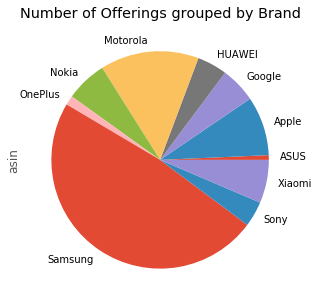

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
# Brand distribution
ax = items.groupby("brand").count()["asin"].plot(kind="pie", 
                                                 figsize=(8, 5),
                                                 title="Number of Offerings grouped by Brand")
plt.show()

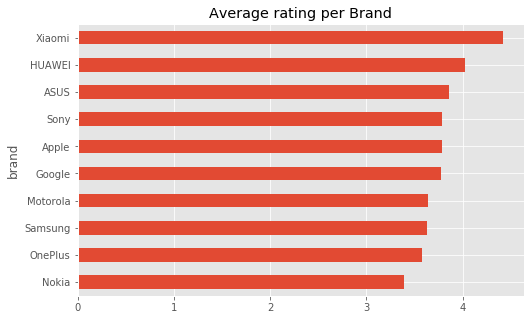

In [6]:
ax = items.groupby("brand").mean()["rating"].sort_values().plot(kind="barh",
                                                                figsize=(8,5), 
                                                                title="Average rating per Brand")
plt.show()


In [7]:
print("The dataset contains {0[0]: ,.0f} rows and {0[1]: .0f} variables.".format(reviews.shape))
reviews.head()

The dataset contains  67,986 rows and  8 variables.


,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [8]:
#Linking  files  through  common word
reviews = pd.merge(reviews, items, how="left", left_on="asin", right_on="asin")

In [9]:
reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0


In [10]:
from datetime import datetime
reviews["date"] = reviews["date"].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
reviews["date"].head()

0   2005-10-11
1   2004-01-07
2   2003-12-30
3   2004-03-18
4   2005-08-28
Name: date, dtype: datetime64[ns]

In [11]:
reviews["month"] = reviews["date"].apply(lambda x: x.replace(day=1))
reviews["month"].head()

0   2005-10-01
1   2004-01-01
2   2003-12-01
3   2004-03-01
4   2005-08-01
Name: month, dtype: datetime64[ns]

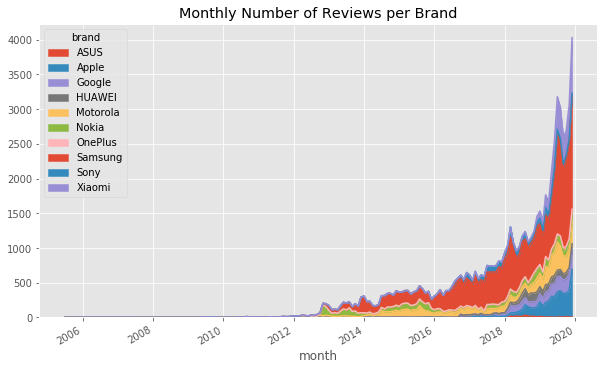

In [12]:
ax = pd.pivot_table(reviews, 
                    index="month", 
                    columns="brand", 
                    values="asin", 
                    aggfunc="count", 
                    fill_value=0).plot.area(title="Monthly Number of Reviews per Brand", figsize=(10, 6))



In [13]:
reviews["positivity"] = reviews["rating"].apply(lambda x: 1 if x>3 else(0 if x==3 else -1))

In [14]:
#Text Cleaning
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
keywords = reviews["brand"].apply(lambda x: x).unique().tolist()
keywords.append("phone")
lemma = WordNetLemmatizer()
def clean_text(text):
    
    text = text.lower()
    wordList = text.split()
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    wordList = [word for word in wordList if word not in stop]
    wordList = [word for word in wordList if word not in keywords]
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)
clean_text("I love reading books.")

'love reading book'

In [15]:
reviews["body"] = reviews["body"].astype("str")
reviews["clean_text"] = reviews["body"].apply(clean_text)

In [16]:
reviews["clean_text"].head().values

array(["samsung a600 awhile absolute doo doo read review detect rage stupid thing finally died used nokia bought garage sale 1 wonder sold cheap bad  hate menu take forever get want scroll endlessly usually phone numbered category u simply press  get want go  pain put silent vibrate class ring turn immediately there's fast way silence damn thing always remember put silent learned hard way  true case mission get break ur nail process also damage case time u try reason started giving problem succeed opening  button could bit bigger vibration could stronger good  reception shabby using elevator remarkable feat considering old would lose service simply putting pocket  compared old samsung work quite well ring tone loud enough hear actually charge quickly great battery life heat like potatoe oven either long convos  nice bright large screen  cute way customize scroll bar set purple pink aqua orange etc overall okay serf purpose definitely pale comparison new phone coming sprint get get grea

In [17]:
def word_freq_dict(text):
    
    wordList = text.split()
    
    wordFreqDict = {word: wordList.count(word) for word in wordList}
    return wordFreqDict
word_freq_dict("I love reading books. I love music.")

{'I': 2, 'love': 2, 'reading': 1, 'books.': 1, 'music.': 1}

In [18]:
apple = reviews[reviews["brand"]=="Apple"].sort_values(by=["date"], ascending=False)
samsung = reviews[reviews["brand"]=="Samsung"].sort_values(by=["date"], ascending=False)
xiaomi = reviews[reviews["brand"]=="Xiaomi"].sort_values(by=["date"], ascending=False)


In [19]:
from wordcloud import WordCloud, ImageColorGenerator

# Define a function to create a wordcloud from dictionary of word frequency
def wordcloud_from_frequency(word_freq_dict, title, figure_size=(10, 6)):
    wordcloud.generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    
# Define a function to plot top10 positive words and top10 negative words in a grouped bar plot (from dictionaries)
def topn_wordfreq_bar_both(pos_word_freq_dict, neg_word_freq_dict, pos_num_doc, neg_num_doc, topn, title, palette, height=6, aspect=2):
    # Transform positive word frequency into DF
    df_pos = pd.DataFrame.from_dict(pos_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_pos.columns = ["frequency"]
    df_pos["frequency"] = df_pos["frequency"] / pos_num_doc
    df_pos["label"] = "Positive"
    # Transform negative word frequency into DF
    df_neg = pd.DataFrame.from_dict(neg_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_neg.columns = ["frequency"]
    df_neg["frequency"] = df_neg["frequency"] / neg_num_doc
    df_neg["label"] = "Negative"
    # Append two dataframes
    df_append = df_pos.append(df_neg)
    df_append.reset_index(inplace=True)
    # Plot
    sns.catplot(x="index", y="frequency", hue="label", data=df_append, 
                kind="bar",
                palette=palette,
                height=height, aspect=aspect, 
                legend_out=False)
    plt.title(title)
    plt.show()


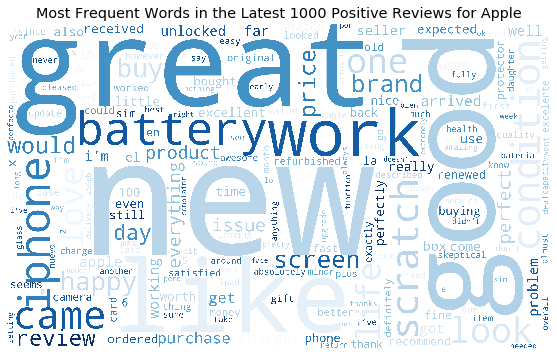

In [20]:
#Apple Input
apple_pos = " ".join(apple[apple["positivity"]==1]["clean_text"][0:1000])
apple_pos_word_freq = word_freq_dict(apple_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="white")
wordcloud_from_frequency(apple_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for Apple")

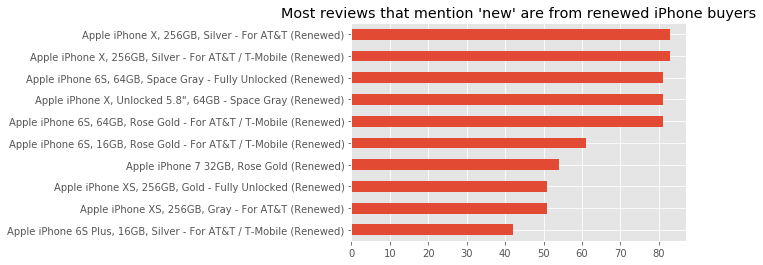

In [21]:
apple[apple["clean_text"].apply(lambda x: "new" in x)]["item_title"].value_counts().sort_values(ascending=True).tail(10).plot(kind="barh")
plt.title("Most reviews that mention 'new' are from renewed iPhone buyers")
plt.show()

In [22]:
apple["renewed"] = apple["item_title"].apply(lambda x: ("Renewed" in x) | ("Reburshied" in x))
print("{0: 0.1%} iPhones that were sold on Amazon are renewed/reburshied.".format(apple["renewed"].sum() / len(apple["renewed"])))

 100.0% iPhones that were sold on Amazon are renewed/reburshied.


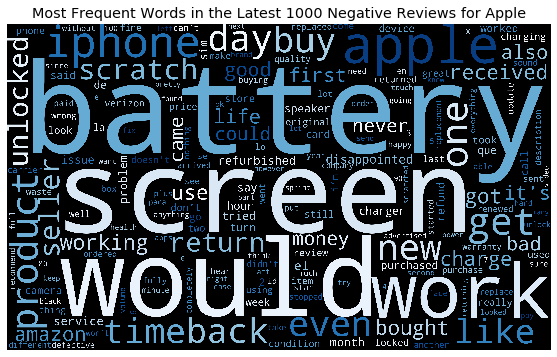

In [23]:
apple_neg = " ".join(apple[apple["positivity"]==-1]["clean_text"][0:1000])
apple_neg_word_freq = word_freq_dict(apple_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Blues",
                      background_color="black")
wordcloud_from_frequency(apple_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Apple")

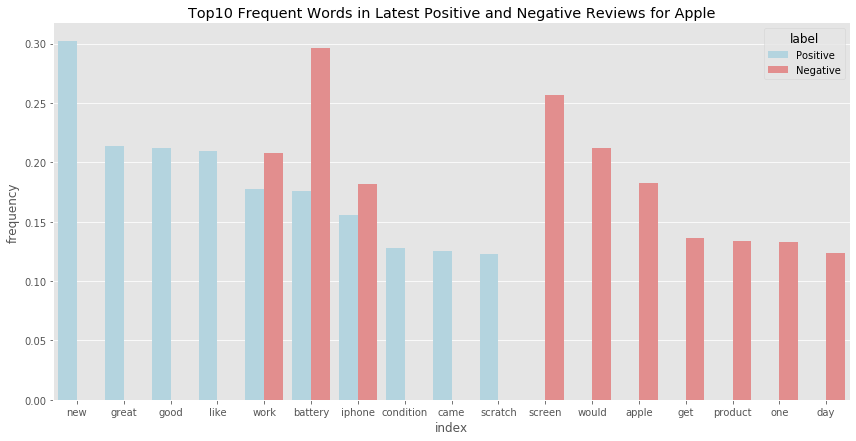

In [24]:
topn_wordfreq_bar_both(apple_pos_word_freq, apple_neg_word_freq, 
                       min(sum(apple["positivity"]==1), 1000), 
                       min(sum(apple["positivity"]==-1), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Apple", 
                       ["lightblue", "lightcoral"], 
                       height=6, aspect=2)

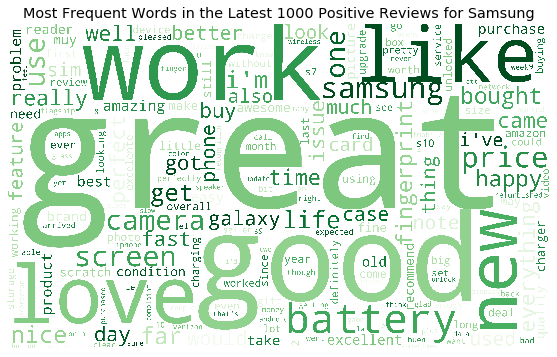

In [25]:
#for samsung
samsung_pos = " ".join(samsung[samsung["positivity"]==1]["clean_text"][0:1000])
samsung_pos_word_freq = word_freq_dict(samsung_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Greens",
                      background_color="white")
wordcloud_from_frequency(samsung_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for Samsung")


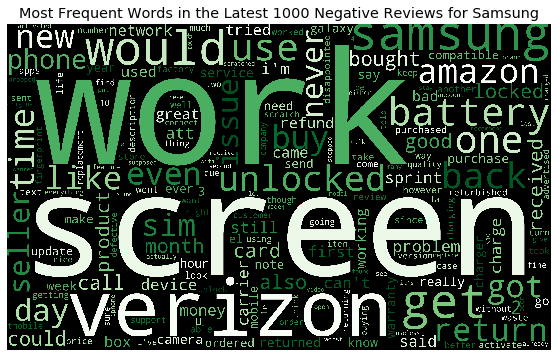

In [26]:
samsung_neg = " ".join(samsung[samsung["positivity"]==-1]["clean_text"][0:1000])
samsung_neg_word_freq = word_freq_dict(samsung_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Greens",
                      background_color="black")
wordcloud_from_frequency(samsung_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Samsung")

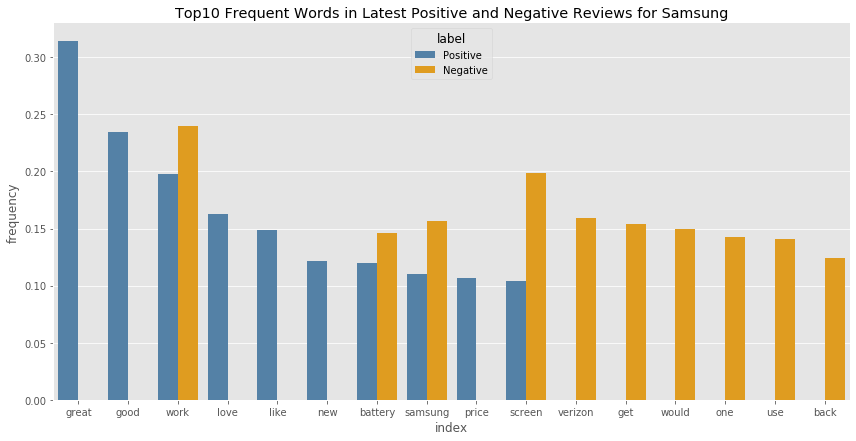

In [27]:
topn_wordfreq_bar_both(samsung_pos_word_freq, samsung_neg_word_freq, 
                       min(sum(samsung["positivity"]==1), 1000), 
                       min(sum(samsung["positivity"]==-1), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Samsung", 
                       ["steelblue", "orange"], 
                       height=6, aspect=2)

In [28]:
dataset = pd.read_csv(r"C:\Users\hp\Documents\MY STUFF\SmartBridge Internship\Data Set\reviews.csv")
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
c=[]
for i in range(0,67986):
    review=dataset["title"][i]
    review=re.sub('[^a-zA-Z]',' ' , review)
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    c.append(review)


FileNotFoundError: [Errno 2] File C:\Users\hp\Documents\Data Set\reviews.csv does not exist: 'C:\\Users\\hp\\Documents\\MY STUFF\\SmartBridge Internship\\Data Set\\reviews.csv'